# Market segmentation steps


In [1]:
import pandas as pd

# Load the dataset  
mcdonalds = pd.read_csv('mcdonalds.csv')

# Display the column names
print(mcdonalds.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [2]:

# Get the dimensions of the DataFrame
dimensions = mcdonalds.shape
print(dimensions)

(1453, 15)


In [3]:
# Get the first 3 rows of the DataFrame
mcdonalds.head(3)



,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [4]:
import numpy as np

# Convert the first 11 columns to a matrix (numpy array) and perform the operations
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert "Yes" to 1 and other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round them to 2 decimal places
col_means = np.round(MD_x.mean(axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [5]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Summary of PCA
print("Proportion of Variance Explained:")
print(pca.explained_variance_ratio_)
print("\nPrincipal Components:")
print(pca.components_)


Proportion of Variance Explained:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Principal Components:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805

In [6]:
# Printing the PCA object with specified digits
print("Standard deviations:")
print([round(std_dev, 1) for std_dev in pca.explained_variance_])
print("\nRotation (principal components):")
print(np.round(pca.components_, 1))


Standard deviations:
[0.6, 0.4, 0.3, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

Rotation (principal components):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


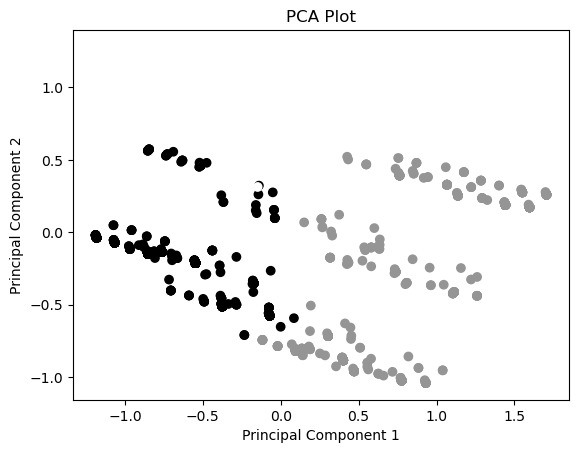

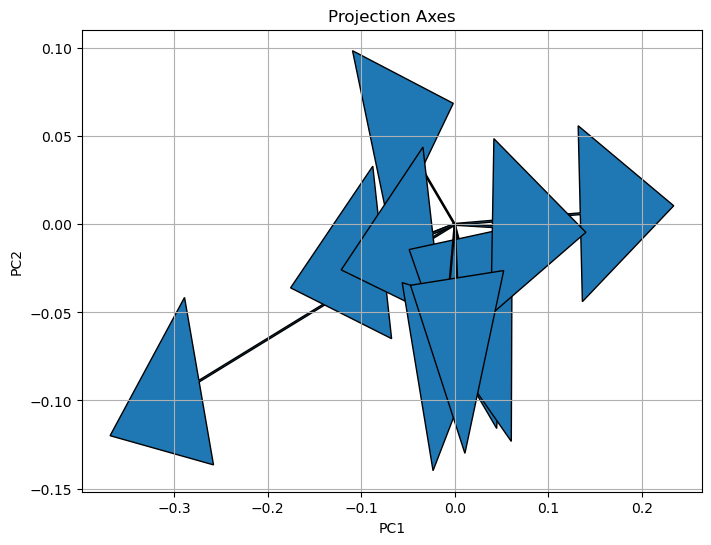

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Cluster the PCA-transformed data
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(MD_pca)

# Plot the PCA transformed data
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=cluster_labels, cmap='Greys')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

# Project the PCA axes
plt.figure(figsize=(8, 6))
for length, vector in zip(pca.explained_variance_, pca.components_):
    plt.arrow(0, 0, vector[0] * length, vector[1] * length, head_width=0.1, head_length=0.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection Axes')
plt.grid()
plt.show()


In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Set seed
np.random.seed(1234)

# Initialize variables to store results
best_model = None
best_score = float('inf')

# Perform KMeans clustering for different numbers of clusters
for n_clusters in range(2, 9):
    for _ in range(10):  # Repeat 10 times
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(MD_x)
        score = kmeans.inertia_  # Inertia measures how spread out the clusters are
        if score < best_score:
            best_score = score
            best_model = kmeans

# Relabel clusters
cluster_labels = best_model.labels_

# Print the best model
print("Best KMeans Model:")
print(best_model)
print("\nCluster labels:")
print(cluster_labels)


F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_pa

Best KMeans Model:
KMeans()

Cluster labels:
[2 6 1 ... 4 0 5]


F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_pa

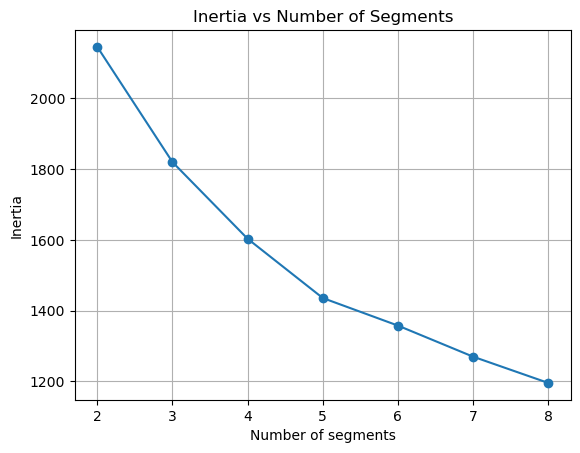

In [9]:
import matplotlib.pyplot as plt

# Initialize lists to store inertia values
inertia_values = []

# Calculate inertia for different numbers of clusters
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Segments')
plt.grid(True)
plt.show()


In [15]:
 from sklearn.metrics import silhouette_score
from sklearn.utils import resample

# Set seed
np.random.seed(1234)

# Initialize lists to store silhouette score values
silhouette_scores = []

# Perform bootstrapping
for n_clusters in range(2, 9):
    boot_scores = []
    for _ in range(100):
        # Bootstrap sampling
        boot_data = resample(MD_x)
        # KMeans clustering
        kmeans = KMeans(n_clusters=n_clusters)
        cluster_labels = kmeans.fit_predict(boot_data)
        # Calculate silhouette score
        silhouette = silhouette_score(boot_data, cluster_labels)
        boot_scores.append(silhouette)
    # Average silhouette score for each number of segments
    avg_silhouette = np.mean(boot_scores)
    silhouette_scores.append(avg_silhouette)

# Plot silhouette score against the number of segments
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Segments')
plt.grid(True)
plt.show()


F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_pa

KeyboardInterrupt: 

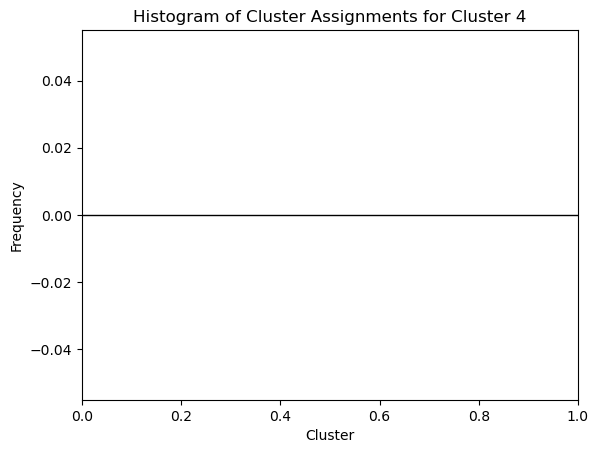

In [20]:
import matplotlib.pyplot as plt

# Extract cluster assignments for the fourth cluster (assuming cluster numbering starts from 0)
cluster_4_assignments = cluster_labels[cluster_labels == 3]  # Assuming '3' is the label for the fourth cluster

# Plot histogram
plt.hist(cluster_4_assignments, bins=[0, 1], edgecolor='black')
plt.xlim(0, 1)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Assignments for Cluster 4')
plt.show()


F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


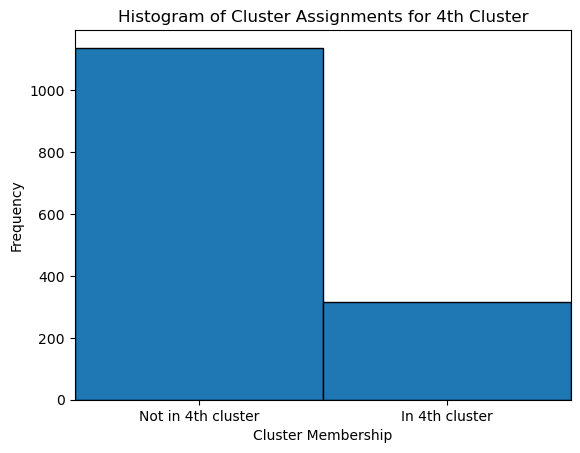

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Yes'/'No' to binary values and keep only the first 11 columns
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == 'Yes' else 0)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
cluster_labels = kmeans.labels_

# Create a boolean mask for the fourth cluster (if clusters are 0-indexed)
fourth_cluster_mask = (cluster_labels == 3)

# Plot histogram
plt.hist(fourth_cluster_mask.astype(int), bins=np.arange(-0.5, 2, 1), edgecolor='black')
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1], labels=['Not in 4th cluster', 'In 4th cluster'])
plt.xlabel('Cluster Membership')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Assignments for 4th Cluster')
plt.show()


F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


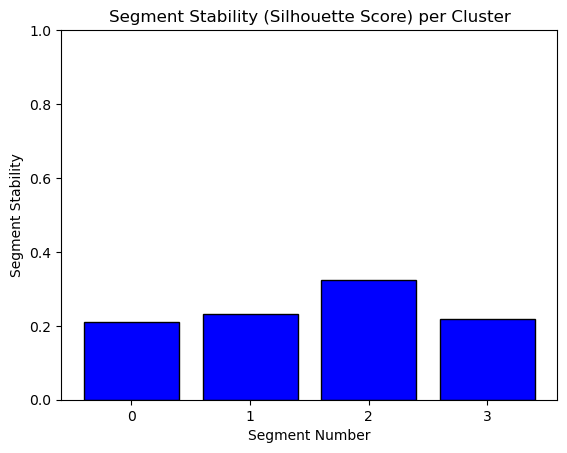

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Yes'/'No' to binary values and keep only the first 11 columns
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == 'Yes' else 0)

# Set seed for reproducibility
np.random.seed(1234)

# Perform KMeans clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans_4.fit(MD_x)

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(MD_x, MD_k4.labels_)
avg_silhouette = silhouette_score(MD_x, MD_k4.labels_)

# Create a DataFrame to hold cluster labels and silhouette scores
silhouette_df = pd.DataFrame({'Cluster': MD_k4.labels_, 'Silhouette Score': silhouette_vals})

# Calculate average silhouette scores for each cluster
avg_silhouette_per_cluster = silhouette_df.groupby('Cluster')['Silhouette Score'].mean()

# Plot the average silhouette scores for each cluster
plt.bar(range(4), avg_silhouette_per_cluster, color='blue', edgecolor='black')
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability (Silhouette Score) per Cluster')
plt.xticks(range(4))
plt.show()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import LabelEncoder

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Yes'/'No' to binary values and keep only the first 11 columns
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == 'Yes' else 0).to_numpy()

# Set seed for reproducibility
np.random.seed(1234)

# Perform Bayesian Gaussian Mixture modeling for a range of clusters (k=2 to k=8)
n_clusters_range = range(2, 9)
best_models = []

for n_clusters in n_clusters_range:
    best_score = -np.inf
    best_model = None

    for _ in range(10):  # nrep=10
        model = BayesianGaussianMixture(n_components=n_clusters, random_state=1234, n_init=1)
        model.fit(MD_x)
        score = model.score(MD_x)

        if score > best_score:
            best_score = score
            best_model = model

    best_models.append(best_model)

# Output the best models for each number of clusters
for i, model in enumerate(best_models, start=2):
    print(f'Number of clusters: {i}')
    print(model)


Number of clusters: 2
BayesianGaussianMixture(n_components=2, random_state=1234)
Number of clusters: 3
BayesianGaussianMixture(n_components=3, random_state=1234)
Number of clusters: 4
BayesianGaussianMixture(n_components=4, random_state=1234)
Number of clusters: 5
BayesianGaussianMixture(n_components=5, random_state=1234)
Number of clusters: 6
BayesianGaussianMixture(n_components=6, random_state=1234)
Number of clusters: 7
BayesianGaussianMixture(n_components=7, random_state=1234)
Number of clusters: 8
BayesianGaussianMixture(n_components=8, random_state=1234)


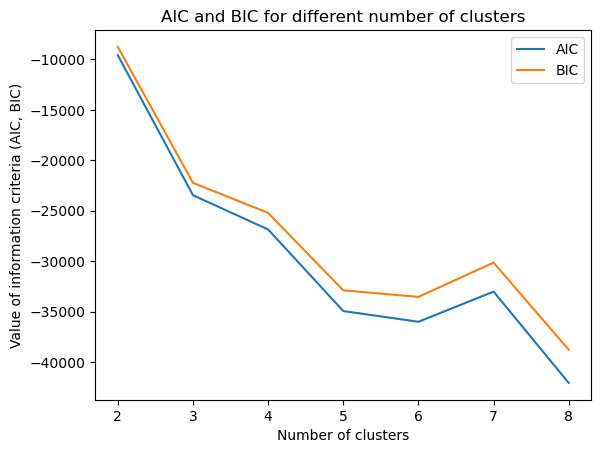

F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


GMM       0    1    2    3
KMeans                    
0        99    5  253    7
1         0  211   24    5
2       500    0    0   33
3        22   38    0  256


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Yes'/'No' to binary values and keep only the first 11 columns
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == 'Yes' else 0).to_numpy()

# Set seed for reproducibility
np.random.seed(1234)

# Fit Gaussian Mixture Models for a range of clusters (k=2 to k=8)
n_clusters_range = range(2, 9)
aic_values = []
bic_values = []
models = []

for n_clusters in n_clusters_range:
    model = GaussianMixture(n_components=n_clusters, random_state=1234)
    model.fit(MD_x)
    aic_values.append(model.aic(MD_x))
    bic_values.append(model.bic(MD_x))
    models.append(model)

# Plot AIC and BIC values
plt.plot(n_clusters_range, aic_values, label='AIC')
plt.plot(n_clusters_range, bic_values, label='BIC')
plt.xlabel('Number of clusters')
plt.ylabel('Value of information criteria (AIC, BIC)')
plt.title('AIC and BIC for different number of clusters')
plt.legend()
plt.show()

# Select the model with 4 clusters
gmm_4 = models[2]  # Index 2 corresponds to 4 clusters

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_labels = kmeans.labels_

# Get GMM cluster assignments
gmm_labels = gmm_4.predict(MD_x)

# Create a contingency table comparing KMeans and GMM clusters
contingency_table = pd.crosstab(kmeans_labels, gmm_labels, rownames=['KMeans'], colnames=['GMM'])
print(contingency_table)


In [1]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Yes'/'No' to binary values and keep only the first 11 columns
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == 'Yes' else 0).to_numpy()

# Set seed for reproducibility
np.random.seed(1234)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_labels = kmeans.labels_

# Fit a Gaussian Mixture Model using the clusters from KMeans as initial clusters
gmm = GaussianMixture(n_components=4, random_state=1234)
gmm.fit(MD_x)
gmm_labels = gmm.predict(MD_x)

# Create a contingency table comparing KMeans and GMM clusters
contingency_table = pd.crosstab(kmeans_labels, gmm_labels, rownames=['KMeans'], colnames=['GMM'])
print(contingency_table)


F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


GMM       0    1    2    3
KMeans                    
0        99    5  253    7
1         0  211   24    5
2       500    0    0   33
3        22   38    0  256


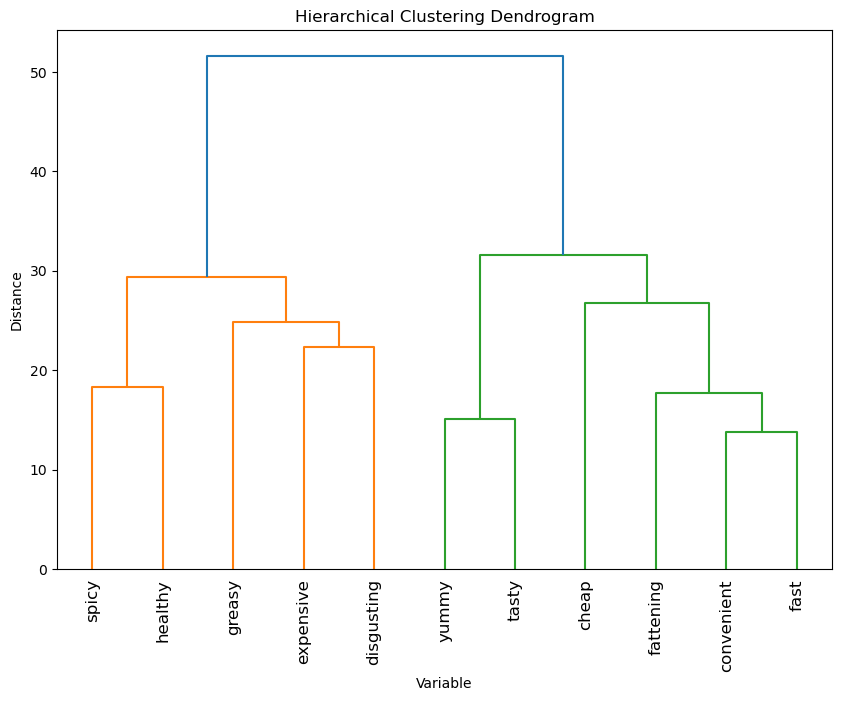

In [2]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Yes'/'No' to binary values and keep only the first 11 columns
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == 'Yes' else 0).to_numpy()

# Calculate the distance matrix and perform hierarchical clustering
dist_matrix = pdist(MD_x.T, metric='euclidean')  # Transpose to cluster columns
linkage_matrix = linkage(dist_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=mcdonalds.columns[:11], leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variable')
plt.ylabel('Distance')
plt.show()


F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


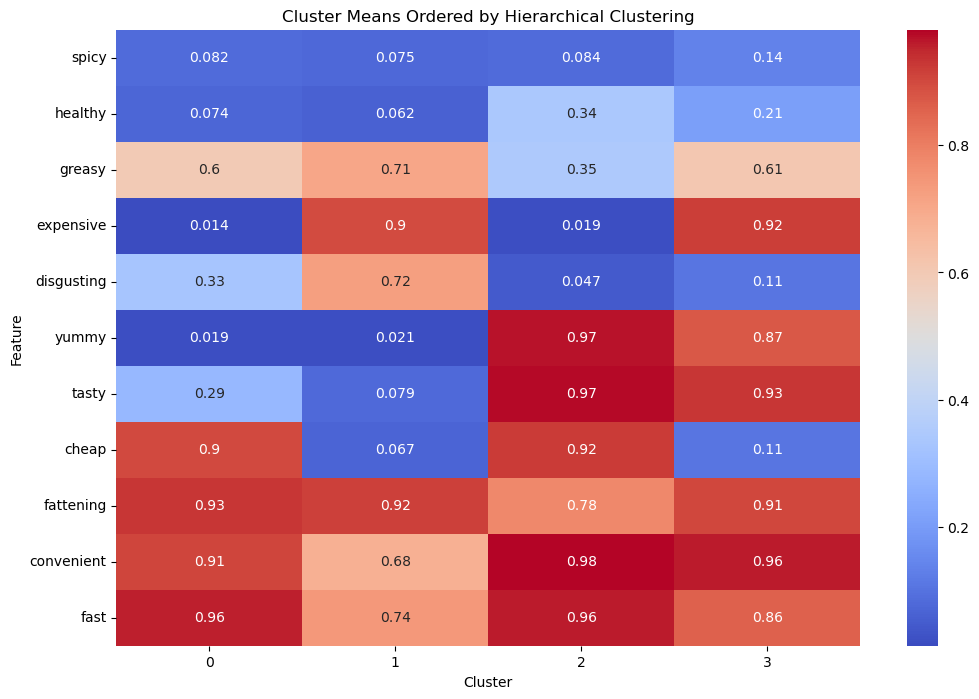

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from scipy.spatial.distance import pdist

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Yes'/'No' to binary values and keep only the first 11 columns
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == 'Yes' else 0).to_numpy()

# Set seed for reproducibility
np.random.seed(1234)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_labels = kmeans.labels_

# Calculate the distance matrix and perform hierarchical clustering
dist_matrix = pdist(MD_x.T, metric='euclidean')  # Transpose to cluster columns
linkage_matrix = linkage(dist_matrix, method='ward')
ordered_columns = leaves_list(linkage_matrix)  # Order of columns

# Create a DataFrame for plotting
clustered_data = pd.DataFrame(MD_x, columns=mcdonalds.columns[:11])
clustered_data['Cluster'] = kmeans_labels

# Reorder columns based on hierarchical clustering
ordered_columns = [clustered_data.columns[i] for i in ordered_columns]

# Plotting the bar chart with clusters and reordered columns
cluster_means = clustered_data.groupby('Cluster').mean().T.loc[ordered_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means, cmap='coolwarm', annot=True)
plt.title('Cluster Means Ordered by Hierarchical Clustering')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.show()


F:\CONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


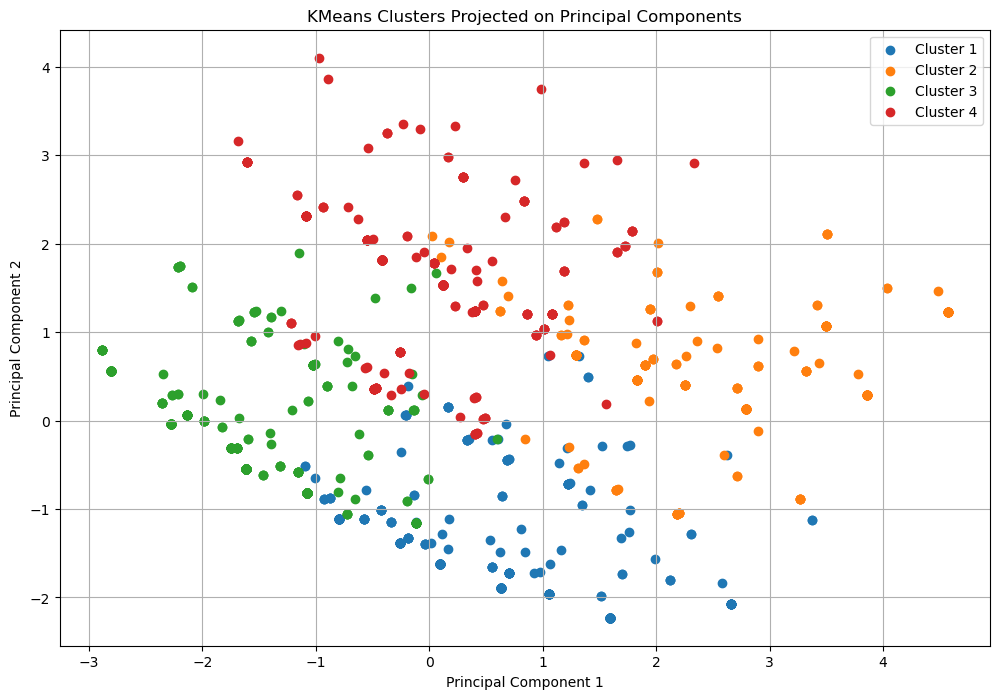

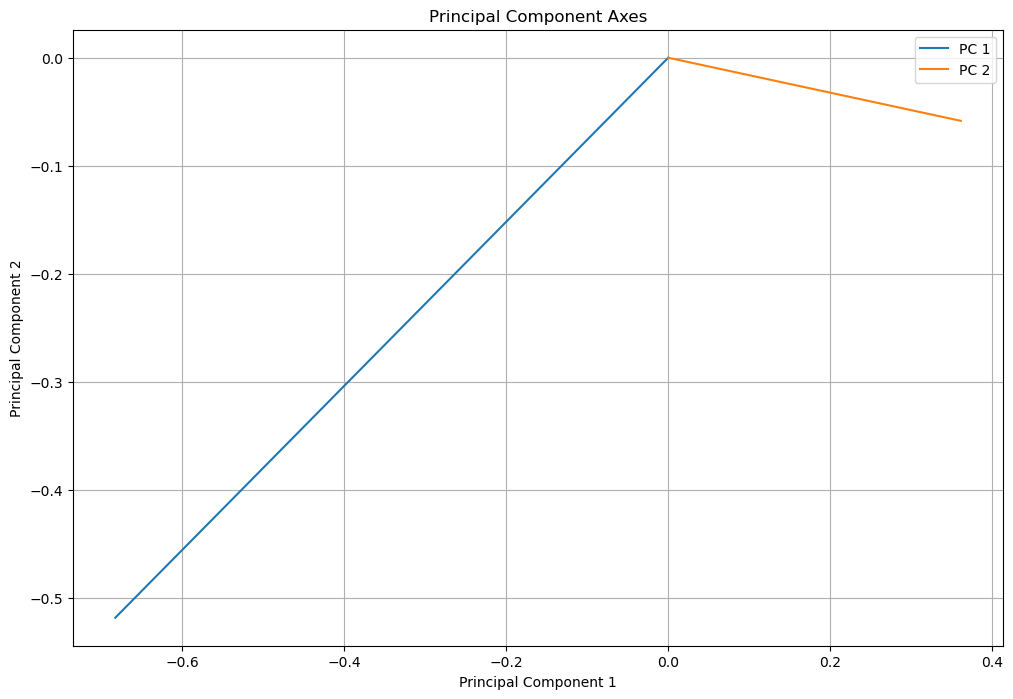

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')

# Convert 'Yes'/'No' to binary values and keep only the first 11 columns
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == 'Yes' else 0).to_numpy()

# Set seed for reproducibility
np.random.seed(1234)

# Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(MD_x)
kmeans_labels = kmeans.labels_

# Standardize the data before applying PCA
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Plotting the clusters on the first two principal components
plt.figure(figsize=(12, 8))
for i in range(4):
    plt.scatter(MD_pca[kmeans_labels == i, 0], MD_pca[kmeans_labels == i, 1], label=f'Cluster {i + 1}')

# Adding labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clusters Projected on Principal Components')
plt.legend()
plt.grid(True)
plt.show()

# Function to plot principal axes (projAxes equivalent)
def plot_proj_axes(pca, data, ax):
    for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
        comp = comp * np.sqrt(var)
        ax.plot([0, comp[0]], [0, comp[1]], label=f'PC {i + 1}')
    ax.legend()

# Plot principal axes
fig, ax = plt.subplots(figsize=(12, 8))
plot_proj_axes(pca, MD_pca, ax)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Axes')
plt.grid(True)
plt.show()


In [19]:
import pandas as pd

# Assuming mcdonalds and k4 are already defined

# Convert VisitFrequency column to numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'])

# Calculate mean visit frequency for each cluster label
visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()
print(visit)


0    2.730769
1    2.691667
2    2.602251
3    2.550633
Name: VisitFrequency, dtype: float64


In [21]:
import pandas as pd

# Assuming mcdonalds and k4 are already defined

# Calculate proportion of females for each cluster label
female = mcdonalds['Gender'].eq('Female').groupby(k4).mean()
print(female)


0    0.0
1    0.0
2    0.0
3    0.0
Name: Gender, dtype: float64


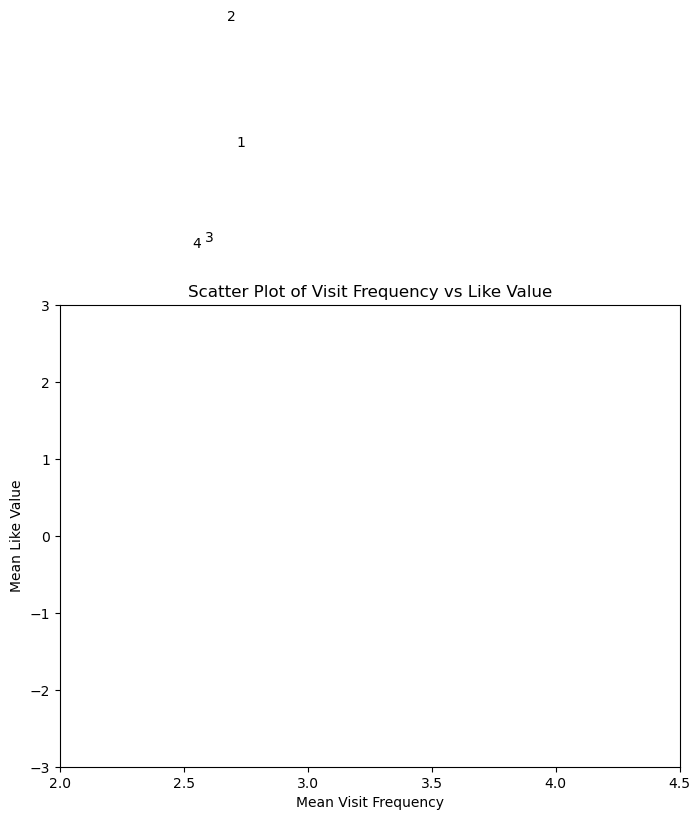

In [24]:
 import pandas as pd
import matplotlib.pyplot as plt

# Assuming mcdonalds and k4 are already defined

# Calculate mean visit frequency for each cluster label
visit = mcdonalds.groupby(k4)['VisitFrequency'].mean()

# Calculate mean value of "Like" column for each cluster label
like = mcdonalds.groupby(k4)['Like'].mean()

# Calculate proportion of females for each cluster label
female = mcdonalds['Gender'].eq('Female').groupby(k4).mean()

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=10 * female, alpha=0.5)

# Set plot limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add text labels
for i in range(len(visit)):
    plt.text(visit[i], like[i], str(i + 1), ha='center', va='center')

# Add labels and title
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Value')
plt.title('Scatter Plot of Visit Frequency vs Like Value')

# Show plot
plt.show()
